# Fourier Domain Adaption

In [59]:
import fda
import cv2
from skimage import io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

if True:
    
    # Read source and target images
    
    #source_im = cv2.imread('example_data/AMD/A0001.jpg')
    source_im = cv2.imread('example_data/nonAMD/N0001.jpg')

    #source_im = cv2.imread('example_data/texture/ple.tif')
    target_im = cv2.imread('example_data/texture/cir.tif')
    
    source_im = cv2.resize(source_im, (500, 500), interpolation = cv2.INTER_AREA) # structure
    target_im = cv2.resize(target_im, (500, 500), interpolation = cv2.INTER_AREA) # style 

    
    # Perform domain adaptation
    if True:
        adapted_im = fda.fda(source_im, target_im, beta=0.005)
        adapted_im2 = fda.fda(target_im, source_im, beta=0.005)
    else:
        adapted_im = source_im
        adapted_im2 = target_im
        
    
    
    

<Figure size 432x288 with 0 Axes>

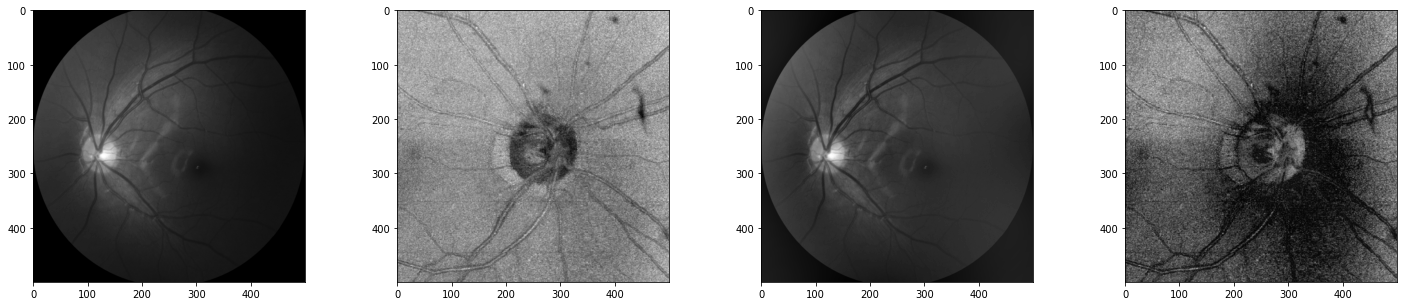

In [60]:
plt.figure()
figure, axis = plt.subplots(1, 4, figsize=(25, 5))
i = 0

axis[i].imshow(cv2.cvtColor(source_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(target_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(adapted_im.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(adapted_im2.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

In [3]:
# histogram matching, colour matching, intensity matching, ...

# Style Transfer Using Texture Synthesis

In [4]:
# https://arxiv.org/pdf/1609.03057.pdf https://github.com/DarkGeekMS/artistic-style-transfer-using-texture-synthesis/blob/master/src/style_transfer.py

In [65]:
import numpy as np
import cv2
from timeit import default_timer
# from sklearn.feature_extraction.image import extract_patches_2d

from sklearn.feature_extraction.image import extract_patches_2d as extract_patches

from skimage.util import view_as_windows, random_noise
from sklearn.neighbors import NearestNeighbors

from art2 import *
from art2.style_transfer import *
from art2.pca_nn import * 

import cv2

from skimage.transform import rescale, resize, downscale_local_mean

#source_im = cv2.imread('example_data/AMD/A0001.jpg') 
source_im = cv2.imread(r'C:\Users\Prinzessin\projects\image_data\iChallenge_AMD_OD_Fovea_lesions\images_Non-AMD\N0067.jpg') # example_data/nonAMD/N0002.jpg') 
#source_im = cv2.imread('example_data/texture/ple.tif')
#source_im = cv2.imread('example_data/texture/cir.tif')
target_im = cv2.imread('example_data/texture/cir.tif')
#target_im = cv2.imread('example_data/texture/ple.tif')


source_im = cv2.resize(source_im, (500, 500), interpolation = cv2.INTER_AREA) # structure
target_im = cv2.resize(target_im, (500, 500), interpolation = cv2.INTER_AREA) # style 

t = target_im.copy()
t[:,:,0] = t[:,:,0] * 1.1
t[:,:,1] = t[:,:,2] * 0.9

output_img = style_transfer(source_im, t, num_pyramid_layers=3, patch_sizes=(50, 40, 30), patch_spacings=(10, 10, 10), num_iters=3, num_irls_iters=10, max_pixel_val=255)
# num_pyramid_layers=3, patch_sizes=(33, 21, 13, 9), patch_spacings=(28, 18, 8, 5), num_iters=3, num_irls_iters=10, max_pixel_val=255

start style transfer
colour change done
(500, 500, 3)
seg mask done
pyramid done
Running on layer 0
(125, 125, 3)
50
(125, 125, 3)
50
(125, 125, 3)
50
(125, 125, 3)
40
(125, 125, 3)
40
(125, 125, 3)
40
(125, 125, 3)
30
(125, 125, 3)
30
(125, 125, 3)
30
Running on layer 1
(250, 250, 3)
50
(250, 250, 3)
50
(250, 250, 3)
50
(250, 250, 3)
40
(250, 250, 3)
40
(250, 250, 3)
40
(250, 250, 3)
30
(250, 250, 3)
30
(250, 250, 3)
30
Running on layer 2
(500, 500, 3)
50
(500, 500, 3)
50
(500, 500, 3)
50
(500, 500, 3)
40
(500, 500, 3)
40
(500, 500, 3)
40
(500, 500, 3)
30
(500, 500, 3)
30
(500, 500, 3)
30


<Figure size 432x288 with 0 Axes>

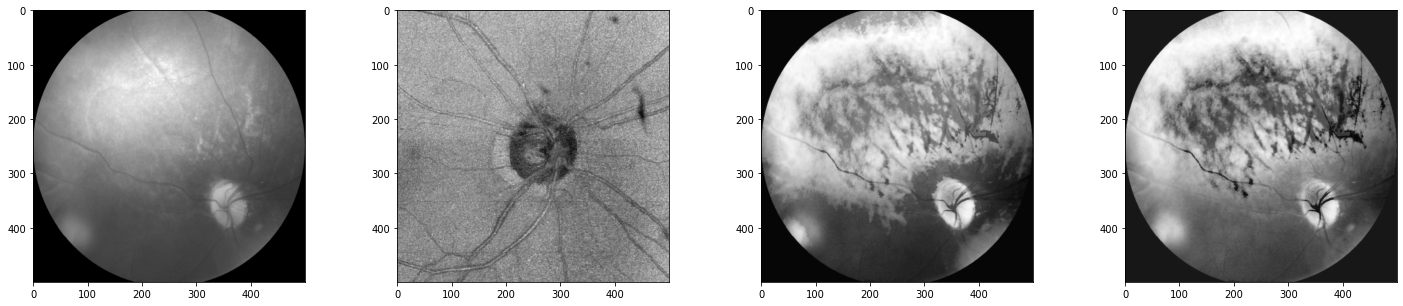

In [66]:
# rgb2gray(output_img.astype(int))
plt.figure()
figure, axis = plt.subplots(1, 4, figsize=(25, 5))
i = 0

axis[i].imshow(cv2.cvtColor(source_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(target_im, cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(cv2.cvtColor(output_img.astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap="gray")
i+=1

axis[i].imshow(rgb2gray(output_img.astype(np.uint8) ), cmap="gray")
i+=1



